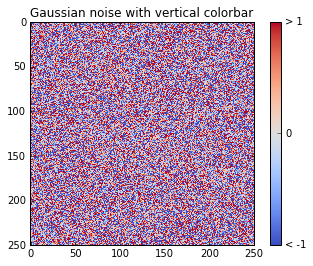

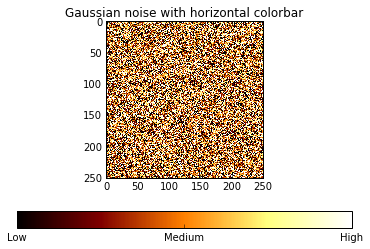

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# Make plot with horizontal colorbar
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, interpolation='nearest', cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()

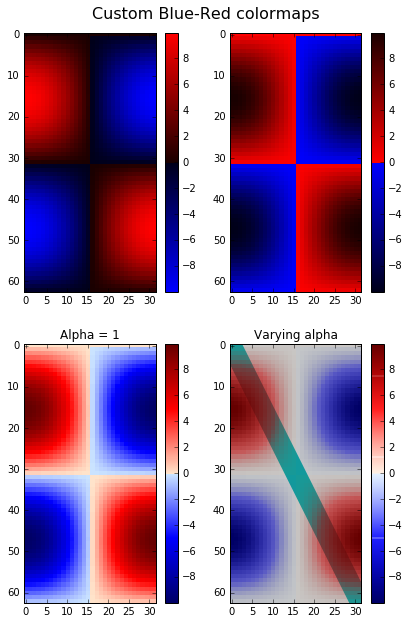

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""


cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = cdict3.copy()
cdict4['alpha'] = ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                   (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                   (1.0, 1.0, 1.0))


# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

# Second, create the map explicitly and register it.
# Like the first method, this method works with any kind
# of Colormap, not just
# a LinearSegmentedColormap:

blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

# Third, for LinearSegmentedColormap only,
# leave everything to register_cmap:

plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

# Make the figure:

plt.figure(figsize=(6, 9))
plt.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

plt.subplot(2, 2, 1)
plt.imshow(Z, interpolation='nearest', cmap=blue_red1)
plt.colorbar()

plt.subplot(2, 2, 2)
cmap = plt.get_cmap('BlueRed2')
plt.imshow(Z, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

plt.subplot(2, 2, 3)
plt.imshow(Z, interpolation='nearest')
plt.colorbar()
plt.title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

plt.subplot(2, 2, 4)
# Draw a line with low zorder so it will be behind the image.
plt.plot([0, 10*np.pi], [0, 20*np.pi], color='c', lw=20, zorder=-1)

plt.imshow(Z, interpolation='nearest')
plt.colorbar()

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
plt.set_cmap('BlueRedAlpha')
plt.title("Varying alpha")
#

plt.suptitle('Custom Blue-Red colormaps', fontsize=16)

plt.show()

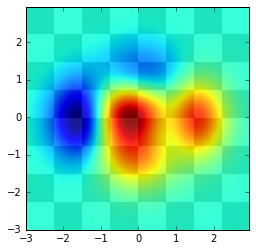

In [2]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np


def func3(x, y):
    return (1 - x/2 + x**5 + y**3)*np.exp(-(x**2 + y**2))

# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)

# when layering multiple images, the images need to have the same
# extent.  This does not mean they need to have the same shape, but
# they both need to render to the same coordinate system determined by
# xmin, xmax, ymin, ymax.  Note if you use different interpolations
# for the images their apparent extent could be different due to
# interpolation edge effects


xmin, xmax, ymin, ymax = np.amin(x), np.amax(x), np.amin(y), np.amax(y)
extent = xmin, xmax, ymin, ymax
fig = plt.figure(frameon=False)

Z1 = np.array(([0, 1]*4 + [1, 0]*4)*4)
Z1.shape = (8, 8)  # chessboard
im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                 extent=extent)
plt.hold(True)

Z2 = func3(X, Y)

im2 = plt.imshow(Z2, cmap=plt.cm.jet, alpha=.9, interpolation='bilinear',
                 extent=extent)

plt.show()

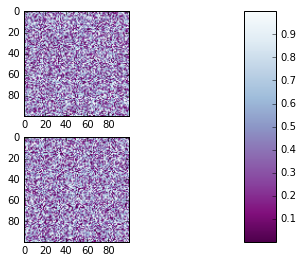

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

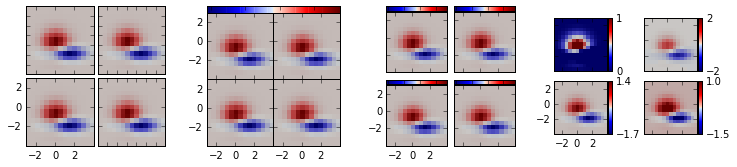

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_simple_grid(fig):
    """
    A grid of 2x2 images with 0.05 inch pad between images and only
    the lower-left axes is labeled.
    """
    grid = AxesGrid(fig, 141,  # similar to subplot(141)
                    nrows_ncols=(2, 2),
                    axes_pad=0.05,
                    label_mode="1",
                    )

    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")

    # This only affects axes in first column and second row as share_all =
    # False.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_single_cbar(fig):
    """
    A grid of 2x2 images with a single colorbar
    """
    grid = AxesGrid(fig, 142,  # similar to subplot(142)
                    nrows_ncols=(2, 2),
                    axes_pad=0.0,
                    share_all=True,
                    label_mode="L",
                    cbar_location="top",
                    cbar_mode="single",
                    )

    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")
    #plt.colorbar(im, cax = grid.cbar_axes[0])
    grid.cbar_axes[0].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(False)

    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_each_cbar(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """

    grid = AxesGrid(fig, 143,  # similar to subplot(143)
                    nrows_ncols=(2, 2),
                    axes_pad=0.1,
                    label_mode="1",
                    share_all=True,
                    cbar_location="top",
                    cbar_mode="each",
                    cbar_size="7%",
                    cbar_pad="2%",
                    )
    Z, extent = get_demo_image()
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest")
        grid.cbar_axes[i].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(False)

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_grid_with_each_cbar_labelled(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """

    grid = AxesGrid(fig, 144,  # similar to subplot(144)
                    nrows_ncols=(2, 2),
                    axes_pad=(0.45, 0.15),
                    label_mode="1",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="each",
                    cbar_size="7%",
                    cbar_pad="2%",
                    )
    Z, extent = get_demo_image()

    # Use a different colorbar range every time
    limits = ((0, 1), (-2, 2), (-1.7, 1.4), (-1.5, 1))
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            vmin=limits[i][0], vmax=limits[i][1])
        grid.cbar_axes[i].colorbar(im)

    for i, cax in enumerate(grid.cbar_axes):
        cax.set_yticks((limits[i][0], limits[i][1]))

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


if 1:
    F = plt.figure(1, (10.5, 2.5))

    F.subplots_adjust(left=0.05, right=0.95)

    demo_simple_grid(F)
    demo_grid_with_single_cbar(F)
    demo_grid_with_each_cbar(F)
    demo_grid_with_each_cbar_labelled(F)

    plt.draw()
    plt.show()

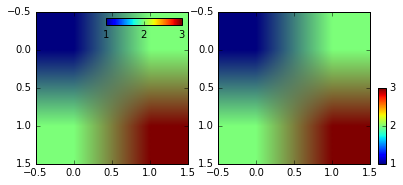

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 3])

axins1 = inset_axes(ax1,
                    width="50%",  # width = 10% of parent_bbox width
                    height="5%",  # height : 50%
                    loc=1)

im1 = ax1.imshow([[1, 2], [2, 3]])
plt.colorbar(im1, cax=axins1, orientation="horizontal", ticks=[1, 2, 3])
axins1.xaxis.set_ticks_position("bottom")

axins = inset_axes(ax2,
                   width="5%",  # width = 10% of parent_bbox width
                   height="50%",  # height : 50%
                   loc=3,
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

# Controlling the placement of the inset axes is basically same as that
# of the legend.  you may want to play with the borderpad value and
# the bbox_to_anchor coordinate.

im = ax2.imshow([[1, 2], [2, 3]])
plt.colorbar(im, cax=axins, ticks=[1, 2, 3])

plt.draw()
plt.show()

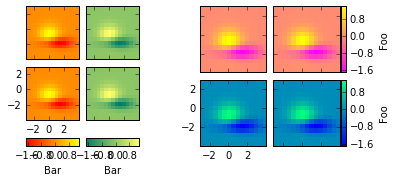

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_bottom_cbar(fig):
    """
    A grid of 2x2 images with a colorbar for each column.
    """
    grid = AxesGrid(fig, 121,  # similar to subplot(132)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    share_all=True,
                    label_mode="1",
                    cbar_location="bottom",
                    cbar_mode="edge",
                    cbar_pad=0.25,
                    cbar_size="15%",
                    direction="column"
                    )

    Z, extent = get_demo_image()
    cmaps = [plt.get_cmap("autumn"), plt.get_cmap("summer")]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            cmap=cmaps[i//2])
        if i % 2:
            cbar = grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label("Bar")

    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_right_cbar(fig):
    """
    A grid of 2x2 images. Each row has its own colorbar.
    """

    grid = AxesGrid(F, 122,  # similar to subplot(122)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    label_mode="1",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="7%",
                    cbar_pad="2%",
                    )
    Z, extent = get_demo_image()
    cmaps = [plt.get_cmap("spring"), plt.get_cmap("winter")]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, interpolation="nearest",
                            cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label('Foo')

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


if 1:
    F = plt.figure(1, (5.5, 2.5))

    F.subplots_adjust(left=0.05, right=0.93)

    demo_bottom_cbar(F)
    demo_right_cbar(F)

    plt.draw()
    plt.show()

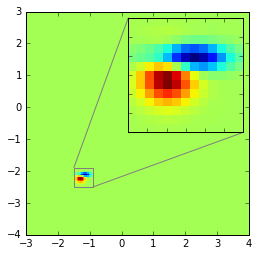

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    import numpy as np
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

fig, ax = plt.subplots(figsize=[5, 4])

# prepare the demo image
Z, extent = get_demo_image()
Z2 = np.zeros([150, 150], dtype="d")
ny, nx = Z.shape
Z2[30:30 + ny, 30:30 + nx] = Z

# extent = [-3, 4, -4, 3]
ax.imshow(Z2, extent=extent, interpolation="nearest",
          origin="lower")

axins = zoomed_inset_axes(ax, 6, loc=1)  # zoom = 6
axins.imshow(Z2, extent=extent, interpolation="nearest",
             origin="lower")

# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

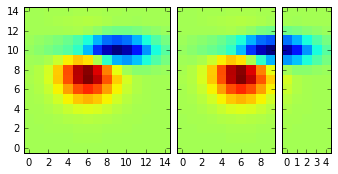

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


def get_demo_image():
    import numpy as np
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

F = plt.figure(1, (5.5, 3.5))
grid = ImageGrid(F, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),
                 axes_pad=0.1,
                 add_all=True,
                 label_mode="L",
                 )

Z, extent = get_demo_image()  # demo image

im1 = Z
im2 = Z[:, :10]
im3 = Z[:, 10:]
vmin, vmax = Z.min(), Z.max()
for i, im in enumerate([im1, im2, im3]):
    ax = grid[i]
    ax.imshow(im, origin="lower", vmin=vmin,
              vmax=vmax, interpolation="nearest")

plt.draw()
plt.show()

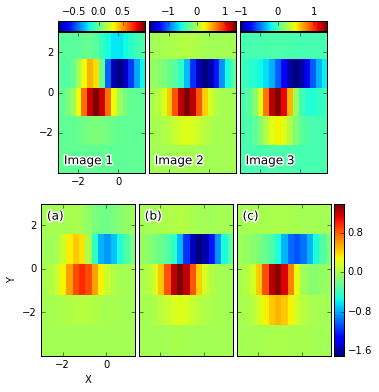

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np


def get_demo_image():
    from matplotlib.cbook import get_sample_data
    f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
    z = np.load(f)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def add_inner_title(ax, title, loc, size=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke
    if size is None:
        size = dict(size=plt.rcParams['legend.fontsize'])
    at = AnchoredText(title, loc=loc, prop=size,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)
    ax.add_artist(at)
    at.txt._text.set_path_effects([withStroke(foreground="w", linewidth=3)])
    return at

if 1:
    F = plt.figure(1, (6, 6))
    F.clf()

    # prepare images
    Z, extent = get_demo_image()
    ZS = [Z[i::3, :] for i in range(3)]
    extent = extent[0], extent[1]/3., extent[2], extent[3]

    # demo 1 : colorbar at each axes

    grid = ImageGrid(F, 211,  # similar to subplot(111)
                     nrows_ncols=(1, 3),
                     direction="row",
                     axes_pad=0.05,
                     add_all=True,
                     label_mode="1",
                     share_all=True,
                     cbar_location="top",
                     cbar_mode="each",
                     cbar_size="7%",
                     cbar_pad="1%",
                     )

    for ax, z in zip(grid, ZS):
        im = ax.imshow(
            z, origin="lower", extent=extent, interpolation="nearest")
        ax.cax.colorbar(im)

    for ax, im_title in zip(grid, ["Image 1", "Image 2", "Image 3"]):
        t = add_inner_title(ax, im_title, loc=3)
        t.patch.set_alpha(0.5)

    for ax, z in zip(grid, ZS):
        ax.cax.toggle_label(True)
        #axis = ax.cax.axis[ax.cax.orientation]
        #axis.label.set_text("counts s$^{-1}$")
        #axis.label.set_size(10)
        #axis.major_ticklabels.set_size(6)

    # changing the colorbar ticks
    grid[1].cax.set_xticks([-1, 0, 1])
    grid[2].cax.set_xticks([-1, 0, 1])

    grid[0].set_xticks([-2, 0])
    grid[0].set_yticks([-2, 0, 2])

    # demo 2 : shared colorbar

    grid2 = ImageGrid(F, 212,
                      nrows_ncols=(1, 3),
                      direction="row",
                      axes_pad=0.05,
                      add_all=True,
                      label_mode="1",
                      share_all=True,
                      cbar_location="right",
                      cbar_mode="single",
                      cbar_size="10%",
                      cbar_pad=0.05,
                      )

    grid2[0].set_xlabel("X")
    grid2[0].set_ylabel("Y")

    vmax, vmin = np.max(ZS), np.min(ZS)
    import matplotlib.colors
    norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)

    for ax, z in zip(grid2, ZS):
        im = ax.imshow(z, norm=norm,
                       origin="lower", extent=extent,
                       interpolation="nearest")

    # With cbar_mode="single", cax attribute of all axes are identical.
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)

    for ax, im_title in zip(grid2, ["(a)", "(b)", "(c)"]):
        t = add_inner_title(ax, im_title, loc=2)
        t.patch.set_ec("none")
        t.patch.set_alpha(0.5)

    grid2[0].set_xticks([-2, 0])
    grid2[0].set_yticks([-2, 0, 2])

    plt.draw()
    plt.show()

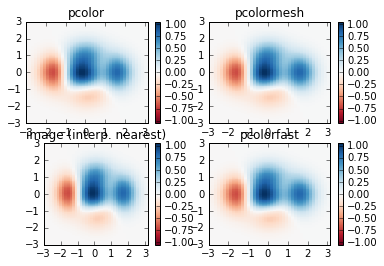

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()


plt.subplot(2, 2, 1)
plt.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


plt.subplot(2, 2, 2)
plt.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolormesh')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


plt.subplot(2, 2, 3)
plt.imshow(z, cmap='RdBu', vmin=z_min, vmax=z_max,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest', origin='lower')
plt.title('image (interp. nearest)')
plt.colorbar()


ax = plt.subplot(2, 2, 4)
ax.pcolorfast(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolorfast')
plt.colorbar()


plt.show()